In [1]:
import os
import re

from typing import Optional


def stats_from_filename(filename) -> Optional[tuple[int, float]]:
    match = re.match(r'output_s(\d+)_r(\d+\.\d+).txt', filename)
    if match:
        return int(match.group(1)), float(match.group(2))
    return None


def stats_from_file(filepath) -> Optional[tuple[int, int]]:
    with open(filepath, 'r') as file:
        for line in file:
            match = re.match(r'(\d+) / (\d+)', line)
            # there should be only one line matching
            if match:
                return int(match.group(1)), int(match.group(2))
    return None


def process_files(directory_path) -> dict[str, list]:
    data = {
        'hits': [],
        'rates': [],
        'batch_sizes': []
    }

    for filename in os.listdir(directory_path):
        filepath = os.path.join(directory_path, filename)

        if os.path.isfile(filepath) and filename.endswith('.txt'):
            batch_size, learning_rate = stats_from_filename(filename)

            if batch_size is not None and learning_rate is not None:
                hits, test_set_size = stats_from_file(filepath)

                if hits is not None and test_set_size is not None:
                    data['hits'].append(hits)
                    data['rates'].append(learning_rate)
                    data['batch_sizes'].append(batch_size)

                    # print(f"File: {filename}, s:{batch_size}, r:{learning_rate}; {hits} / {test_set_size}")
    
    return data

In [4]:
# Assumes running in the same folder as output_files is in
data = process_files('../output_files')

i = data['hits'].index(max(data['hits']))
print(data['hits'][i], data['batch_sizes'][i], data['rates'][i])

8748 256 0.04354


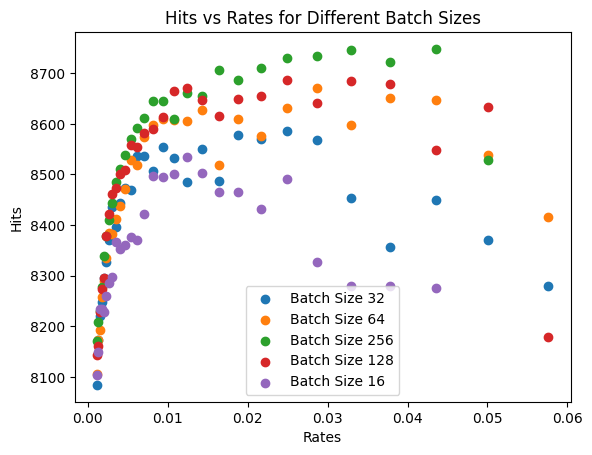

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame(data)
df = df[df['hits'] != 1000]  # 
df.sort_values('rates')

# Get unique batch sizes
batch_sizes = df['batch_sizes'].unique()

# Plot each batch size with a different color
for batch_size in batch_sizes:
    batch_data = df[df['batch_sizes'] == batch_size]
    plt.scatter(batch_data['rates'], batch_data['hits'], label=f'Batch Size {batch_size}')

# Add labels and legend
plt.xlabel('Rates')
plt.ylabel('Hits')
plt.title('Hits vs Rates for Different Batch Sizes')
plt.legend()
plt.grid()
plt.show()